# Estadística

El objetivo del siguiente notebook es, además de repasar conceptos de estadística, que presten atención a cómo se calculan algunas cosas con Numpy y se hacen gráficos con Matplotlib (¿qué?¿qué es eso? Lo veremos más adelante. Por ahora, solamente tienen que instalar la librería Matplotlib y correr las celdas).


## Distribuciones de probabilidad

El concepto de distribución de probabilidad es un concepto central en probabilidad y estadística y, por lo tanto, hay mucho para decir. Nos limitamos acá a los puntos más importantes.

Comencemos por un ejemplo: un dado de seis caras. La probabilidad de que al tirar el dado *salga* una cara es $1/6$. Si graficamos la probabilidad para cada resultado posible de tirar un dado, obtendríamos un gráfico como el siguiente:

In [34]:
import numpy as np
import matplotlib.pyplot as plt

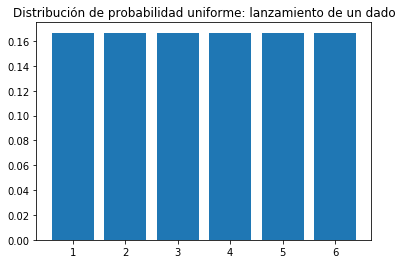

In [35]:
valores = np.arange(1,7)
probas = np.zeros(6) + 1/6
plt.bar(valores, probas)
plt.title('Distribución de probabilidad uniforme: lanzamiento de un dado')
# plt.savefig('distribucion_dado.png', dpi = 400)
plt.show()

En este caso, decimos que la distribución de probabilidad es *uniforme discreta*, ya que le asigna la misma probabilidad a los seis valores que pueden salir al tirar el dado. Si el dado estuviera cargado, ya no sería uniforme.

**Algunos detalles**:
1. El resultado de tirar un dado es un ejemplo de una *variable aleatoria*.
2. En el caso del dado, la variable aleatoria puede tomar valores *discretos* y *acotados* (limitados): 1, 2, 3, 4, 5 y 6
3. Existen variables aleatorias donde los posibles valores que puede tomar son continuos y no acotados. Veremos la distribución más famosa de ellas a continuación.

### Distribución Normal o Gaussiana

La distribución normal o gaussiana debe ser la distribución más famosa dentro de las distribuciones. Es una distribución de variable continua y aparece en una infinidad de ámbitos de la ciencia. Muchas variables asociadas a fenómenos naturales siguen una distribución gaussiana; un ejemplo típico es la estatura de las personas. Recomendamos entrar en la página de Wikipedia y prestar atención a la sección "Propiedades":
https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal

Los dos parámetros de una distribución Gaussiana son: su valor medio $\mu$ y su desviacíon estándar $\sigma$. Estos valores son *teóricos*, es decir, son propios de la distribución de probabilidad. Numpy nos provee de herramientas para generar valores aleatorios de distribuciones normales. A continuación generamos, usando `np.random.normal()`, muestras de dos distribuciones normales, con el mismo valor medio pero distinta desviación estándar. **Consultar** la ayuda de la función para entender bien qué hace.

In [36]:
mu = 2.0
sigma_1 = 5.0
sigma_2 = 2.0
muestras_1 = np.random.normal(loc = mu, scale = sigma_1, size = 400)
muestras_2 = np.random.normal(loc = mu, scale = sigma_2, size = 400)
print(muestras_1, muestras_2)

[  5.88805715  -0.09456502   1.9559081   -1.28967609   1.88767373
   5.65668487   1.90236563   8.58379862   0.45084543  -2.70064675
   2.76012336  -2.14087668   3.5253896    4.34606704  -1.68407791
  -6.59056397   4.78674773   2.4732663    8.54244504  12.59337701
   2.36510755   7.17516301  -0.27660728   5.07278095  -4.21153622
   3.60096811   1.51945302  -2.22184491   6.80963233   2.85295708
   1.60686702   3.12400088   0.61316263  -5.62162895  -1.71035401
   2.9558748    0.55022912  -8.87747292  -4.32108216   9.18015914
  11.24193588  -0.81639367   9.946715     7.69085496   1.19085957
   9.55243129  -3.27863977   0.17590404   3.07794844   5.2007106
   0.25408388   3.37246987  -3.10629429   3.61103757  11.51225716
   3.77936604  -7.37611706  -0.13536095   4.96834941   7.72576278
  -3.12794334  -0.71314774   1.03822515  -4.3872315   -4.22247248
  -2.72022171  -6.83527977   7.04352426  -2.05434462   1.99020033
  -3.66355981  -4.21894095  -4.71447822  -2.72944256  -2.34111145
   0.631987

Notar que son dos "tiras" de números, bastante largas y que a simple vista no nos dicen mucho. Mejor, podemos graficar su histograma (¿Qué es eso? Nuevamente, lo veremos durante las próximas clases, pero se pueden ir familiarizando).

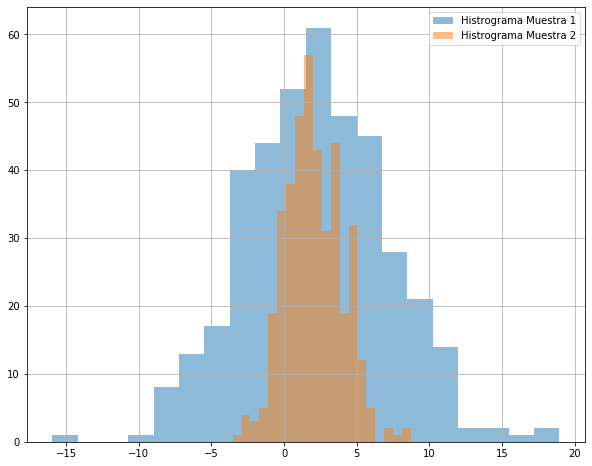

In [37]:
plt.figure(figsize = (10,8))
plt.hist(muestras_1, bins = 20, alpha = 0.5, label = 'Histrograma Muestra 1')
plt.hist(muestras_2, bins = 20, alpha = 0.5, label = 'Histrograma Muestra 2')
plt.legend()
plt.grid()
plt.show()

Volver a "generar" las muestas y hacer sus histogramas. ¿Cambió?¿Por qué?

### Promedio

Dados $n$ números $x_1,x_2,...,x_n$, el promedio o media es 

$$\overline{x} = \frac{1}{n}\sum_{i=1}^{n} x_i = \frac{x_1 + x_2 + ... + x_n}{n}$$

y lo podemos calcular *a mano* con Python

In [38]:
x_s = np.array([1,2,3,1,2,2,3,4,1,2,3,4,1,2,4])
n = len(x_s)

#forma lenta
x_mean = 0
for x in x_s:
    x_mean +=x
x_mean/=n
print(x_mean)

2.3333333333333335


o, mejor, usando Numpy

In [39]:
x_mean = np.mean(x_s)
print(x_mean)

2.3333333333333335


**Comentarios**:
1. Dado un conjunto de números, el promedio suele ser considerado el número más representativo de ese conjunto. Esto no siempre es así. Pensar por qué.
    suele ser un valor bajo un ideal pero el mundo no se apega a ese tipo de condiciones
2. Al conjunto de números $x_1,...,x_n$ los pueden encontrar por el nombre de *población* o *muestra* (¡Ojo que no estamos diciendo que *población* y *muestra* sean lo mismo!).


### Desviación Estándar

La desviación estándar nos da una idea de cuán "dispersos" están los valores con respecto a su promedio. En general se usa la letra griega $\sigma$ para representarla (igual que el parámetro $\sigma$ de la distribución normal, ¡pero refieren a cosas distintas - aunque relacionadas!) o las siglas $SD$. Como no queremos que se confundan, preferimos la segunda opción.

$$ SD = \sqrt{\frac{\sum_{i=1}^{n} (x_i -\overline{x})^2}{n - 1}}$$

Numpy, nuevamente, tiene funciones ya incorporadas que calculan la desviación estándar de un arreglo:

In [40]:
x_std = np.std(x_s)
print(x_std)

1.0749676997731399


**Para investigar**: ¿qué es el parámetro `ddof` de esa función?

### Promedio y desviación estándar en una distribución Normal

En una distribución normal, el promedio de las muestras obtenidas *tiende* al valor medio $\mu$ de la distribución, y la desviación estándar *tiende* a la desviacíon estándar $\sigma$ de la distribución. Notar, entonces, que existen valores calculados (promedio, desviación estándar) y valores teóricos ($\mu$ y $\sigma$). Confundirlos entre sí es un error común.

In [41]:
mu = 8.5
sigma = 3.0
muestras = np.random.normal(loc = mu, scale = sigma, size = 400)

In [42]:
print('Valor medio teorico:', mu, '. Valor medio calculado:', muestras.mean())
print('Desviacion estandar teorica:', sigma, '. Desviacion estandar calculada:', muestras.std())

Valor medio teorico: 8.5 . Valor medio calculado: 8.615490061553412
Desviacion estandar teorica: 3.0 . Desviacion estandar calculada: 3.0739864531754826


¿Por qué no coinciden?  es posible que se deba al ddof que posiblemente este tomando valores diferentes ¿Qué podemos hacer para que se parezcan cada vez más? tratar de promediar los valores calculados en cada manera!!

## Repaso: Estadística con Python/Numpy

Como vimos, en la librería Numpy ya hay funciones que calculan varios *estadísticos* dada una muestra


In [43]:
x_s = np.array([1,2,3,1,2,2,3,4,1,2,3,4,1,2,4])
x_mean = np.mean(x_s) #alternativamente, x_s.mean()
std = np.std(x_s) #alternativamente, x_s.std()
print(x_mean, std)

2.3333333333333335 1.0749676997731399


También hay funciones que generan muestras al azar de una distribución

In [45]:
promedio = 2.0
std = 5.0
muestras_normal = np.random.normal(loc = promedio, scale = std, size = 400)
print(muestras_normal[:50])

[ 11.66962771   3.09084333   4.87652574 -10.00570212   0.67074891
  -2.81299726   4.53180008   2.07540453  -6.00624108   0.77352861
   3.45806573  14.27376101  -6.21081752  -1.63038367   6.58936696
   2.74182656   2.65177061  -2.12493129   8.34348332   9.16445382
   5.88921927   4.64576729   0.1010857    9.38964363  -2.3053264
  14.06368775  -1.9249403    5.27604897   5.61120295   0.27769995
 -10.56339298   1.89507766   7.0980448   -1.2432586    5.02240618
  -7.6571458    1.9387592   -2.29408804   0.06973874  -4.14652197
   2.22677808   1.37896029  -4.50228938  -4.42336514   0.60581936
   2.35117205  -2.0799782   -3.69663278  -2.08995098   3.17662184]


Y con Matplotlib podemos hacer histogramas

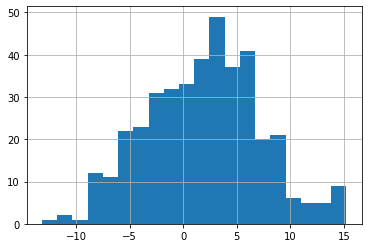

In [46]:
plt.hist(muestras_normal, bins = 20)
plt.grid()
plt.show()

## Ejercicio

¿Cuál será el promedio de los valores obtenidos de tirar muchas veces un dado? Vamos a tratar de responder esta pregunta *simulando* un dado y luego comparar con el valor teórico.

1. Obtener 30 muestras al azar de un dado. No hay una única forma de hacerlo. Pueden googlear o mirar la documentación del módulo *random* de Numpy (https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html). Pista: choice o randint.

In [47]:
import numpy as np
import matplotlib.pyplot as plt

basenumerica = np.arange(1,7,1)
print (basenumerica)


[1 2 3 4 5 6]


In [48]:
muestra = np.arange(30)
print(muestra)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


In [49]:
muestrareal=[]
for itemcito in muestra:
    valor = np.random.choice(basenumerica, None, True,None)
    muestrareal.append(valor)
print(muestrareal)

[4, 3, 6, 4, 3, 6, 3, 4, 2, 3, 4, 4, 4, 3, 1, 2, 1, 5, 1, 4, 6, 4, 4, 4, 2, 3, 6, 1, 6, 3]


[]

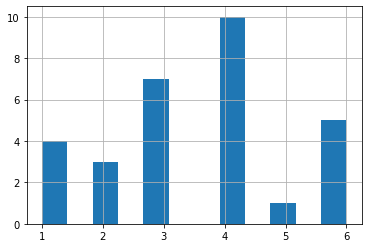

In [54]:
plt.hist(muestrareal,bins = 12 )
plt.grid()
plt.plot()

In [55]:
mediecita = np.mean(muestrareal)
deviation = np.std(muestrareal)

print (mediecita, deviation)

3.533333333333333 1.5216949614017772


2. Hacer el histograma. ¿Se parece a lo que esperaban? Volver esta celda y la anterior, pero obteniendo 1000 muestras.

In [70]:
import numpy as np
import matplotlib.pyplot as plt

basenumerica = np.arange(1,7,1)
print (basenumerica)

muestra = np.arange(1000)
#print(muestra)
muestrareal2=[]
for itemcito in muestra:
    valor = np.random.choice(basenumerica, None, True,None)
    muestrareal2.append(valor)
print(muestrareal2)


[1 2 3 4 5 6]
[3, 5, 3, 4, 3, 6, 5, 6, 4, 5, 3, 4, 6, 6, 2, 3, 1, 6, 3, 3, 3, 4, 1, 5, 1, 6, 6, 3, 6, 4, 6, 3, 5, 2, 6, 5, 5, 4, 6, 5, 2, 5, 1, 6, 2, 1, 5, 6, 1, 1, 4, 2, 5, 6, 3, 1, 1, 6, 4, 5, 1, 4, 5, 1, 6, 2, 2, 1, 2, 1, 1, 6, 6, 6, 1, 6, 1, 3, 2, 3, 6, 4, 1, 5, 6, 5, 3, 3, 6, 4, 2, 2, 5, 6, 2, 2, 6, 5, 5, 3, 6, 3, 2, 3, 1, 6, 4, 1, 2, 1, 5, 2, 4, 3, 4, 3, 1, 4, 2, 2, 1, 2, 4, 1, 6, 3, 1, 6, 4, 3, 4, 4, 1, 3, 4, 5, 2, 2, 2, 6, 3, 4, 2, 3, 6, 1, 6, 6, 5, 1, 4, 4, 1, 3, 1, 2, 4, 5, 3, 6, 4, 1, 5, 4, 5, 2, 4, 1, 5, 2, 1, 3, 1, 5, 5, 6, 5, 4, 6, 6, 3, 2, 1, 1, 3, 4, 3, 6, 5, 1, 4, 2, 3, 4, 5, 4, 2, 2, 2, 1, 3, 2, 3, 5, 6, 2, 6, 6, 3, 2, 1, 1, 1, 6, 4, 2, 1, 1, 1, 3, 6, 6, 6, 5, 2, 4, 4, 4, 2, 6, 5, 6, 1, 2, 4, 5, 6, 1, 2, 1, 4, 4, 3, 3, 6, 4, 5, 3, 5, 2, 5, 3, 4, 3, 2, 6, 1, 2, 3, 6, 4, 2, 4, 3, 6, 2, 1, 6, 5, 6, 5, 4, 3, 1, 6, 1, 5, 1, 3, 6, 6, 4, 6, 6, 4, 3, 4, 4, 3, 3, 6, 3, 4, 3, 3, 5, 6, 2, 6, 5, 1, 2, 3, 6, 4, 5, 4, 5, 4, 5, 5, 6, 4, 5, 4, 5, 2, 2, 2, 5, 2, 1, 5, 4, 1, 5, 2, 2, 1

In [71]:
x_mean = np.mean(muestrareal2)
std = np.std(muestrareal2)
x_median = np.median(muestrareal2)
print(x_mean, std, x_median)

3.503 1.728580631616587 3.0


[]

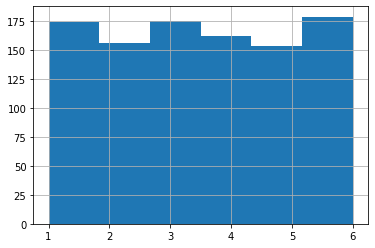

In [72]:
plt.hist(muestrareal2, bins = 6)
plt.grid()
plt.plot()

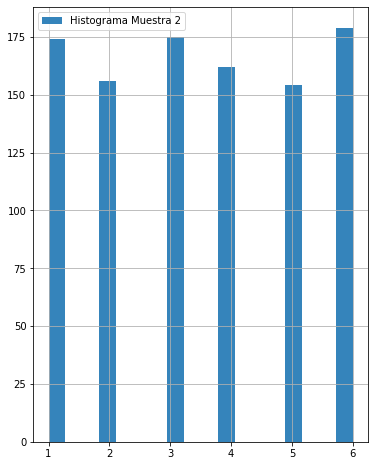

In [73]:
plt.figure(figsize = (6,8))
plt.hist(muestrareal2, bins = 18, alpha = 0.9, label = 'Histograma Muestra 2')
plt.legend()
plt.grid()
plt.show()

3. Obtener el valor medio y la desviación estándar de la distribución.

In [69]:
x_mean = np.mean(muestrareal)
std=np.std(muestrareal)
print(x_mean, std)


3.533333333333333 1.5216949614017772


4. Averiguar cuales son los valores *esperados*. ¿Están cerca de los valores que obtuvieron ustedes? Pista: mirar en Wikipedia (en inglés) las propiedades de la distribución uniforme discreta.

In [60]:
muestras = np.random.normal(loc = x_mean, scale = std, size = 1000)

5. ¿Cómo se modifica si el dado está *cargado*?. Simular un dado cargado (pueden *cargar* el número que quieran). Pista: choice

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

basenumerica = np.arange(1,7,1)
print (basenumerica)

muestra = np.arange(1000)
#print(muestra)
muestrareal=[]
for itemcito in muestra:
    valor = np.random.choice(basenumerica,  None, False, None)
    muestrareal.append(valor)
print(muestrareal)

In [ ]:
# a. Crear un arreglo que asigne probabilidades a cada valor del dado. Recordar que las probabilidades deben sumar 1
probabilidades = COMPLETAR
# probabilidades = probabilidades/probabilidades.sum() # puede ser util

In [ ]:
# b. Generar las muestras
COMPLETAR

In [ ]:
COMPLETAR